In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [8]:
class Logistic():

    def __init__(self):
        self.dataMatrix = []
        self.dataLabel = []

    def get_data(self):
        f = open('数据.txt').readlines()
        for line in f:
            line_list = line.strip().split()
            self.dataMatrix.append([1, float(line_list[0]), float(line_list[1])])
            self.dataLabel.append(int(line_list[2]))

        # for i in self.dataMatrix:
        #     print(i)
        # print()
        # print(self.dataLabel)
        mat_Label = np.mat(self.dataLabel).transpose()
        dataMatrix = self.dataMatrix
        return dataMatrix, mat_Label

    def sigmoid(self, in_X):
        return 1 / (1 + np.exp(-in_X))

    def graAscent(self, dataMatrix, matLabel):
        """
        随机梯度上升算法的实现，对于数据量较多的情况下计算量小，但分类效果差
        :param dataMatrix:数据矩阵
        :param matLabel: 标签的转置
        :return: 参数 w
        """
        m, n = np.shape(dataMatrix)
        matMatrix = np.mat(dataMatrix)
        w = np.ones((n, 1))
        num = 200  # 这里的这个迭代次数对于分类效果影响很大，很小时分类效果很差
        for i in range(num):
            for j in range(m):
                alpha = 4 / (1 + i + j) + 0.01
                error = self.sigmoid(matMatrix[j] * w) - matLabel[j]
                w = w - alpha * matMatrix[j].transpose() * error
        return w

    def drow(self, weight):
        x0List = []
        y0List = []
        x1List = []
        y1List = []
        f = open('数据.txt', 'r')
        for line in f.readlines():
            lineList = line.strip().split()
            if lineList[2] == '0':
                x0List.append(float(lineList[0]))
                y0List.append(float(lineList[1]))
            else:
                x1List.append(float(lineList[0]))
                y1List.append(float(lineList[1]))

        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.scatter(x0List, y0List, s=10, c='red')
        ax.scatter(x1List, y1List, s=10, c='green')

        xList = []
        yList = []
        x = np.arange(-3, 3, 0.1)
        for i in np.arange(len(x)):
            xList.append(x[i])

        y = (-weight[0] - weight[1] * x) / weight[2]
        for j in np.arange(y.shape[1]):
            yList.append(y[0, j])

        ax.plot(xList, yList)
        plt.xlabel('x1');
        plt.ylabel('x2')
        plt.show()

    def main(self):
        data_Matrix, mat_Label = self.get_data()
        # print(data_Matrix)
        # print(mat_Label)
        w = self.graAscent(data_Matrix, mat_Label)
        print("参数w的求解结果：" )
        print(w)
        print()
        print()
        self.drow(w)

参数w的求解结果：
[[15.71617883]
 [ 1.25463272]
 [-2.20925424]]




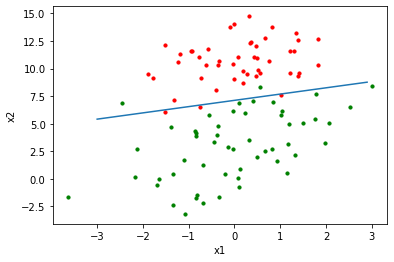

In [9]:
if __name__ == '__main__':
    logistic = Logistic()
    logistic.main()
